[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Available columns: Index(['Customer_ID', 'Website', 'review', 'score', 'Label'], dtype='object')
Top 10 words:
good: 285
app: 184
nice: 134
paytm: 116
best: 45
service: 45
payment: 41
money: 40
super: 38
ipo: 36

Named Entities:
One - CARDINAL
one - CARDINAL
Nice Great Most imstal - WORK_OF_ART
Superb - PERSON
Nice - GPE
Bangalore Traffic Fines - PERSON
IPO - ORG
IPO - ORG
last 8 years - DATE
Worst - ORG
3000 - CARDINAL
Google - ORG
App Very - PERSON
Awesome - ORG
Nice - GPE
Better Best - ORG
Superb - NORP
Refference - PERSON
Nice - GPE
Nice - GPE
Normal Good ok Been - PERSON
only one - CARDINAL
Nice - GPE
last 3 days - DATE
a month - DATE
today - DATE
IVR - ORG
Nice - PERSON
Sehaj - GPE
Super Give - ORG
Shivaji bhai - PERSON
bhai - GPE
last 3 days - DATE
Worst - ORG
Worst - ORG
IPO - ORG
25% - PERCENT
Jai shree ram - PERSON
Nice - GPE
Nic - PERSON
Recharge - PERSON
Awesome Good Awesome  Nice Excellent - FAC
daily - DATE
00000 - CARDINAL
Indian - NORP
One - CARDINAL
1 week ago - DATE
J

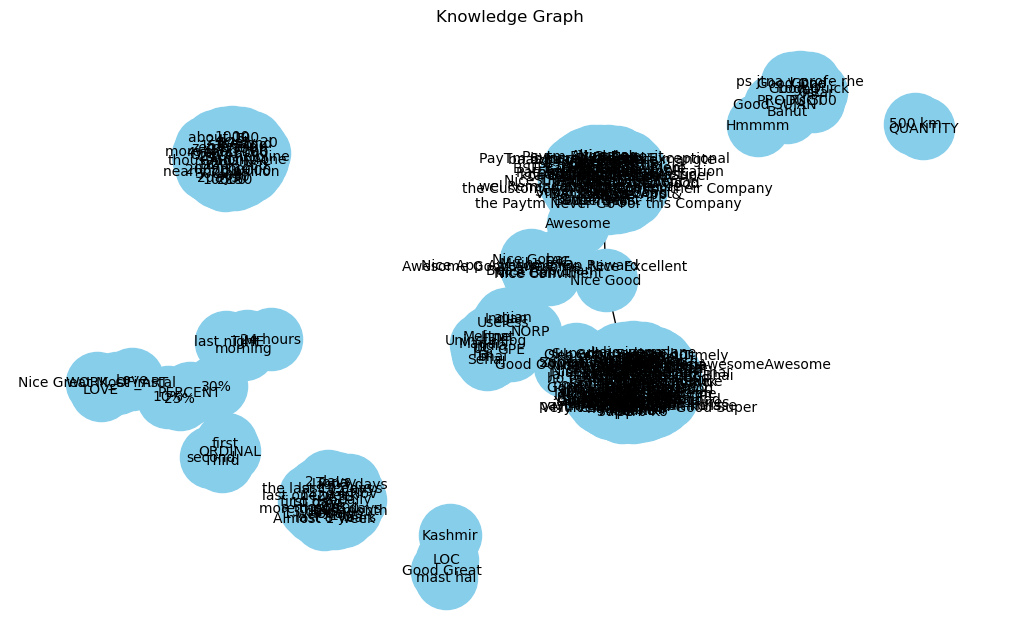

In [17]:
import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the Excel file
# Replace 'Rushith_Phonepay.xlsx' with the path to your Excel file
excel_file = 'Abhiram_paytm.xlsx'
df = pd.read_excel(excel_file)

# Step 1: Check column names to find the correct one
print("Available columns:", df.columns)

# Replace 'comment' with the actual column name containing the text data
# Assuming there's a column with text data (replace 'comment' if it's different)
text_column = 'review'  # Change this based on actual column name

if text_column in df.columns:
    # Combine all comments into a single string
    text_data = ' '.join(df[text_column].astype(str).tolist())  
else:
    raise KeyError(f"Column '{text_column}' not found in the DataFrame. Available columns: {df.columns}")

# Step 2: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower())  # Tokenize and convert to lower case
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)

print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Step 3: Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)

print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Step 4: Derive Knowledge Graph
edges = []
for ent in doc.ents:
    edges.append((ent.text, ent.label_))

# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 5: Draw the knowledge graph
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black')
plt.title('Knowledge Graph')
plt.show()


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


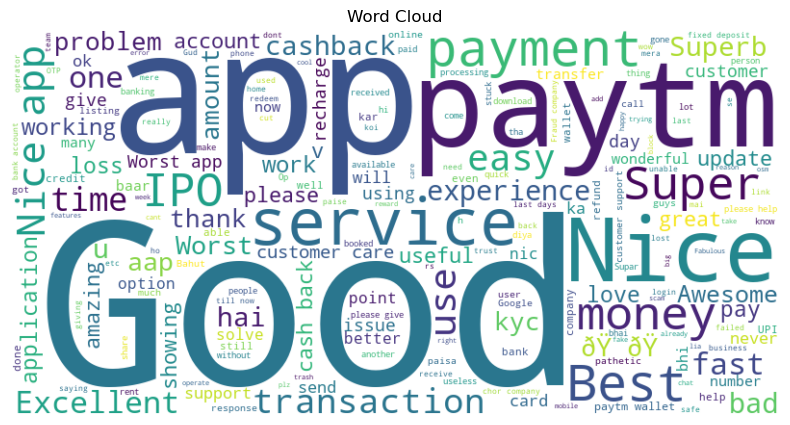

In [5]:
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [7]:
from nltk import ngrams
# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
    print(f"{' '.join(bigram)}: {count}")


Top 10 Bigrams:
good good: 49
nice good: 29
good app: 28
app good: 28
nice app: 27
good nice: 19
app nice: 13
cash back: 12
customer care: 12
good service: 12


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['review'])
# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_df.head())


TF-IDF Matrix:
   00000  0star   10  100  1000  10000  100rup  10x   14  1428  ...   ye  \
0    0.0    0.0  0.0  0.0   0.0    0.0     0.0  0.0  0.0   0.0  ...  0.0   
1    0.0    0.0  0.0  0.0   0.0    0.0     0.0  0.0  0.0   0.0  ...  0.0   
2    0.0    0.0  0.0  0.0   0.0    0.0     0.0  0.0  0.0   0.0  ...  0.0   
3    0.0    0.0  0.0  0.0   0.0    0.0     0.0  0.0  0.0   0.0  ...  0.0   
4    0.0    0.0  0.0  0.0   0.0    0.0     0.0  0.0  0.0   0.0  ...  0.0   

   year  years  yes  yhi  yousing  yrs  zero  zomato   ðÿ  
0   0.0    0.0  0.0  0.0      0.0  0.0   0.0     0.0  0.0  
1   0.0    0.0  0.0  0.0      0.0  0.0   0.0     0.0  0.0  
2   0.0    0.0  0.0  0.0      0.0  0.0   0.0     0.0  0.0  
3   0.0    0.0  0.0  0.0      0.0  0.0   0.0     0.0  0.0  
4   0.0    0.0  0.0  0.0      0.0  0.0   0.0     0.0  0.0  

[5 rows x 1166 columns]
